Классы Fashion MNIST
====================
| Номер класса | Name        | Название     |
|--------------|-------------|--------------|
| 0.           | T-shirt/top | Футболка/топ |
| 1.           | Trouser     | Брюки        |
| 2.           | Pullover    | Свитер       |
| 3.           | Dress       | Платье       |
| 4.           | Coat        | Пальто       |
| 5.           | Sandal      | Сандали      |
| 6.           | Shirt       | Рубашка      |
| 7.           | Sneaker     | Кроссовок    |
| 8.           | Bag         | Сумка        |
| 9.           | Ankle boot  | Ботинок      |

# TENSORFLOW

In [1]:
import time

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.callbacks import TensorBoard

import warnings
warnings.filterwarnings('ignore')

In [2]:
(x_train, y_train_raw), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Преобразование размерности изображений
x_train = x_train.reshape(60000, 784) # 784 = 28*28, 60000 - количество изображений в обучающей выборке

# Нормализация данных
x_train = x_train / 255 # Максимальное значение пикселя 255, на выходе 0-1

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Ботинок


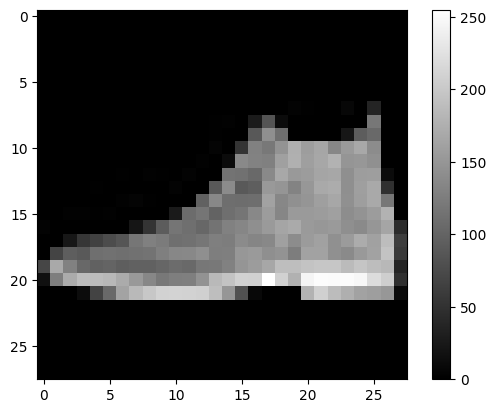

In [4]:
y_train = utils.to_categorical(y_train_raw, 10) # 10 - количество классов
classes = ['Футболка/топ', 'Брюки', 'Свитер', 'Платье', 'Пальто', 'Сандали', 'Рубашка', 'Кроссовок', 'Сумка', 'Ботинок']
print(y_train[0])
print(classes[y_train[0].argmax()])
from matplotlib import pyplot as plt
plt.imshow(x_test[0], cmap='gray')
plt.colorbar()
plt.title('')
plt.show()

In [5]:
model = Sequential()
model.add(Dense(800, input_dim=784, activation="relu")) # 800 - количество нейронов в 1 слое
model.add(Dense(10, activation="softmax")) # 10 - количество классов

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 800)            │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
from tensorflow.keras.callbacks import Callback

# Напишем только последний результат, чтобы не засорять
class LastEpochLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch == self.params['epochs'] - 1:
            print(f"Epoch {epoch+1}/{self.params['epochs']}")
            for key, value in logs.items():
                print(f"{key}: {value:.4f}", end=' ')
            print()

In [7]:
import time

NAME = f"mnist-fashion-800x10-{int(time.time())}"
tensorboard = TensorBoard(log_dir=f'logs/{NAME}')

model.fit(x_train, y_train, batch_size=200, epochs=100, verbose=0, callbacks=[LastEpochLogger(), tensorboard])

Epoch 100/100
accuracy: 0.8937 loss: 0.3068 


In [8]:
x_test = x_test.reshape(10000, 784)
x_test = x_test / 255 # Максимальное значение пикселя 255, на выходе 0-1
y_predict = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [9]:
import numpy as np
to_compare = 30
print(f"Сравним {to_compare} первых результатов:")
for i in range(to_compare):
    expected = classes[y_test[i]]
    predicted = classes[np.argmax(y_predict[i])]
    result = 'Совпал' if expected == predicted else 'Не совпал'
    print(f'Для {i} результат {result}: ожидаемый {expected}, предсказанный {predicted}')

Сравним 30 первых результатов:
Для 0 результат Совпал: ожидаемый Ботинок, предсказанный Ботинок
Для 1 результат Совпал: ожидаемый Свитер, предсказанный Свитер
Для 2 результат Совпал: ожидаемый Брюки, предсказанный Брюки
Для 3 результат Совпал: ожидаемый Брюки, предсказанный Брюки
Для 4 результат Совпал: ожидаемый Рубашка, предсказанный Рубашка
Для 5 результат Совпал: ожидаемый Брюки, предсказанный Брюки
Для 6 результат Совпал: ожидаемый Пальто, предсказанный Пальто
Для 7 результат Совпал: ожидаемый Рубашка, предсказанный Рубашка
Для 8 результат Совпал: ожидаемый Сандали, предсказанный Сандали
Для 9 результат Совпал: ожидаемый Кроссовок, предсказанный Кроссовок
Для 10 результат Совпал: ожидаемый Пальто, предсказанный Пальто
Для 11 результат Совпал: ожидаемый Сандали, предсказанный Сандали
Для 12 результат Не совпал: ожидаемый Кроссовок, предсказанный Сандали
Для 13 результат Совпал: ожидаемый Платье, предсказанный Платье
Для 14 результат Совпал: ожидаемый Пальто, предсказанный Пальто
Дл

Как мы видим, наша модель способна предсказывать в большинстве случаев. Посмотрим в каких конкретно случаях модель ошибается.

In [10]:
from collections import defaultdict
from tabulate import tabulate

non_matched = defaultdict(lambda: defaultdict(int))

for i in range(len(y_predict)):
    expected = classes[y_test[i]]
    predicted = classes[np.argmax(y_predict[i])]
    if expected != predicted:
        non_matched[expected][predicted] += 1

table_data = []
for expected, predicted_dict in non_matched.items():
    for predicted, count in predicted_dict.items():
        table_data.append([expected, predicted, count])
headers = ["Ожидаемый", "Предсказанный", "Счетчик"]
print(tabulate(table_data, headers, tablefmt="grid"))

+--------------+-----------------+-----------+
| Ожидаемый    | Предсказанный   |   Счетчик |
+==============+=================+===========+
| Кроссовок    | Сандали         |        23 |
+--------------+-----------------+-----------+
| Кроссовок    | Ботинок         |        27 |
+--------------+-----------------+-----------+
| Пальто       | Свитер          |        81 |
+--------------+-----------------+-----------+
| Пальто       | Платье          |        32 |
+--------------+-----------------+-----------+
| Пальто       | Рубашка         |        64 |
+--------------+-----------------+-----------+
| Пальто       | Сумка           |         6 |
+--------------+-----------------+-----------+
| Пальто       | Сандали         |         1 |
+--------------+-----------------+-----------+
| Пальто       | Футболка/топ    |         1 |
+--------------+-----------------+-----------+
| Ботинок      | Кроссовок       |        42 |
+--------------+-----------------+-----------+
| Ботинок    

Как видно по этим данным, модель чаще ошибается со смежными элементами одежды (рубашка - топ, ботинок - кроссовок) и реже с разными (пальто - сумка, ботинок - сумка), что вполне логично и показывает, что модель вполне неплохо справляется с классификацией одежды.

# PYTORCH

In [11]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [12]:
# Конвертируем изображение из сета MNIST в 4-мерный тензор (цветовые каналы, число изображений, высота, ширина)
transform = transforms.ToTensor()

In [13]:
train_data = datasets.FashionMNIST(root='./fashion_mnist', train=True, download=True, transform=transform)

In [14]:
test_data = datasets.FashionMNIST(root='./fashion_mnist', train=False, download=True, transform=transform)

In [15]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./fashion_mnist
    Split: Train
    StandardTransform
Transform: ToTensor()

In [16]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./fashion_mnist
    Split: Test
    StandardTransform
Transform: ToTensor()

In [17]:
# Генераторы данных
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [18]:
# Создадим модель
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1) # 1 color channel, 6 output channels, 3x3 kernel, stride 1
        self.conv2 = nn.Conv2d(6, 16, 3, 1) # 6 input channels, 16 output channels, 3x3 kernel, stride 1
        # Fully connected layers
        self.fc1 = nn.Linear(5*5*16, 120) # 5x5 image dimension, 16 channels, 120 output
        self.fc2 = nn.Linear(120, 84) # 120 input, 84 output
        self.fc3 = nn.Linear(84, 10) # 84 input, 10 output (number of classes)
        
    def forward(self, X):
        # First layer
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2) # 2x2 kernel, stride 2
        # Second layer
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2) # 2x2 kernel, stride 2
        
        # Flatten the tensor
        X = X.view(-1, 5*5*16) # Flatten the tensor
        
        # Fully connected layers
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [19]:
# Инициализируем модель
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [20]:
# Функция потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [21]:
import time

start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# Loop of epochs
for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b += 1
        
        # Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Print interim results
    print(f'Epoch {i + 1} Loss: {loss.item()}')
            
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    # Testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test)
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()
    
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

current_time = time.time()
total = current_time - start_time
print(f"Training took {total//60:.0f}m {total%60:.0f}s")

Epoch 1 Loss: 0.25173884630203247
Epoch 2 Loss: 0.3711837828159332
Epoch 3 Loss: 0.34184473752975464
Epoch 4 Loss: 0.4608762264251709
Epoch 5 Loss: 0.45865073800086975
Epoch 6 Loss: 0.10830845683813095
Epoch 7 Loss: 0.6618529558181763
Epoch 8 Loss: 0.0228576622903347
Epoch 9 Loss: 0.013521768152713776
Epoch 10 Loss: 0.07252457737922668
Training took 7m 24s


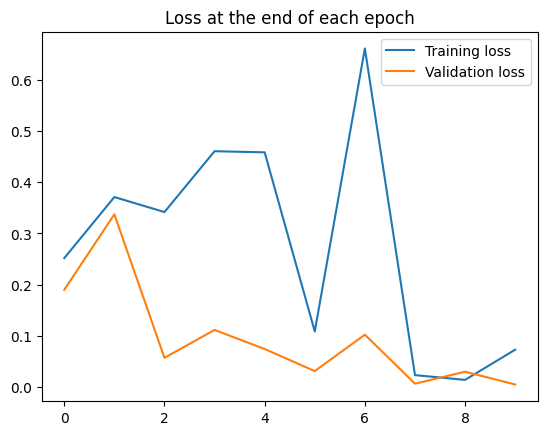

In [22]:
train_losses = [tlt.item() for tlt in train_losses]
test_losses = [tlt.item() for tlt in test_losses]
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.title('Loss at the end of each epoch')
plt.legend()

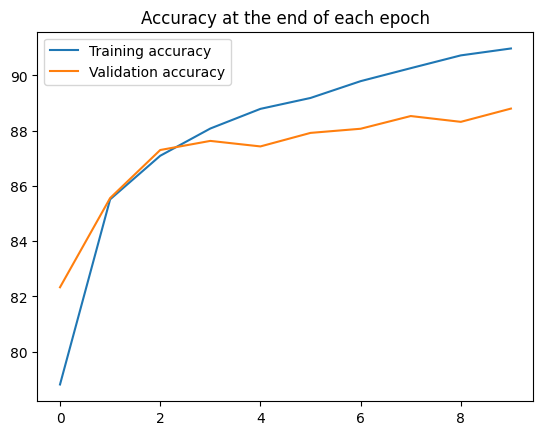

In [23]:
plt.plot([t/600 for t in train_correct], label='Training accuracy')
plt.plot([t/100 for t in test_correct], label='Validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()

In [24]:
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [25]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted == y_test).sum()

In [26]:
correct.item() / len(test_data) * 100

88.8

Изображение 999 класса 7 (Кроссовок)
Предсказанный класс 7 (Кроссовок)


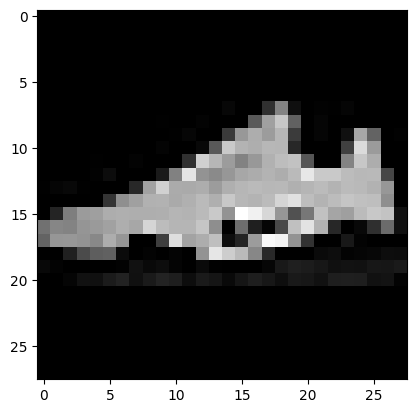

In [27]:
# Возьмем одно изображение из тестового набора
image_nr = 999
test_image_tensor = test_data[image_nr] # Tensor with image with label
test_image_class = test_image_tensor[1]
print(f'Изображение {image_nr} класса {test_image_class} ({classes[test_image_class]})')
test_image_data = test_image_tensor[0]
# Reshape the image to [1, 1, 28, 28] (batch size, color channels, height, width)
reshaped_image = test_image_data.reshape(28, 28)
# Show image
plt.imshow(reshaped_image, cmap='gray')

# Pass to model
model.eval()
with torch.no_grad():
    new_pred = model(test_image_data.view(1, 1, 28, 28))
    
print(f'Предсказанный класс {new_pred.argmax().item()} ({classes[new_pred.argmax().item()]})')

Как видно, модель на PyTorch показывает схожие результаты с моделью на TensorFlow.
Обе технологии вполне неплохо справляются с задачей классификации одежды.